In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

# Load the dataset
dataset_path = '/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/results/all_books_all_topics.csv'
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset for verification
print("Dataset Preview:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Drop missing values if any
df.dropna(inplace=True)

# Verify data types
print("\nData Types:")
print(df.dtypes)

# Standardize probability scores
scaler = StandardScaler()
df['Probability_Standardized'] = scaler.fit_transform(df[['Probability']])

# Verify standardization
print("\nStandardized Probabilities (mean and std):")
print(df['Probability_Standardized'].mean(), df['Probability_Standardized'].std())

# Combine Topic numbers with labels for clearer identification
df['Topic_Full'] = df['Topic'] + " - " + df['Topic_Label']

# Reshape data for clustering (pivot table)
data_pivot = df.pivot_table(index='Book Title', columns='Topic_Full', values='Probability_Standardized', fill_value=0)

# Verify reshaped data
print("\nPivot Table Shape:", data_pivot.shape)
print(data_pivot.head())

# Step 2: Clustering Analysis

# Elbow method to determine the optimal number of clusters
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pivot)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Perform clustering for 3, 4, and 5 clusters
clusters = {}
silhouette_scores = {}

for n_clusters in [3, 4, 5]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_pivot)
    clusters[n_clusters] = labels
    silhouette_scores[n_clusters] = silhouette_score(data_pivot, labels)
    print(f"\nSilhouette Score for {n_clusters} clusters: {silhouette_scores[n_clusters]}")

# Step 3: PCA for Dimensionality Reduction and Visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_pivot)

# Verify explained variance
print("\nExplained Variance by PCA Components:", pca.explained_variance_ratio_)

# Visualize clusters for 3, 4, and 5 clusters
for n_clusters in [3, 4, 5]:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters[n_clusters], palette='Set1', s=50)
    plt.title(f'PCA Visualization for {n_clusters} Clusters')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Cluster')
    plt.grid()
    plt.show()

# Step 4: Detailed Analysis for 5 Clusters
labels_5_clusters = clusters[5]
df['Cluster'] = df['Book Title'].map(dict(zip(data_pivot.index, labels_5_clusters)))

# List the top 5 book titles for each cluster
for cluster in range(5):
    print(f"\nCluster {cluster} - Top 5 Books:")
    print(df[df['Cluster'] == cluster]['Book Title'].unique()[:5])

# Analyze topic dominance, specificity, and spread
cluster_stats = []

for cluster in range(5):
    cluster_data = data_pivot[labels_5_clusters == cluster]
    mean_prob = cluster_data.mean()
    std_prob = cluster_data.std()
    cluster_stats.append((mean_prob, std_prob))
    print(f"\nCluster {cluster}:")
    print(f"Mean Probabilities:\n{mean_prob.sort_values(ascending=False)[:15]}")
    print(f"Standard Deviations:\n{std_prob.sort_values(ascending=False)[:15]}")

# Step 5: Visualizations
# Visualize topic distributions for each cluster
for cluster in range(5):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cluster_stats[cluster][0].index, y=cluster_stats[cluster][0].values)
    plt.title(f'Topic Distributions in Cluster {cluster}')
    plt.xlabel('Topic (Number - Label)')
    plt.ylabel('Mean Probability')
    plt.xticks(rotation=90)
    plt.grid()
    plt.show()

# Correlation analysis for cross-cluster comparison
correlation_matrix = data_pivot.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Topic Correlation Across Clusters')
plt.show()


Output hidden; open in https://colab.research.google.com to view.

Missing values in the dataset: Book Title     0
Topic          0
Topic_Label    0
Probability    0
dtype: int64


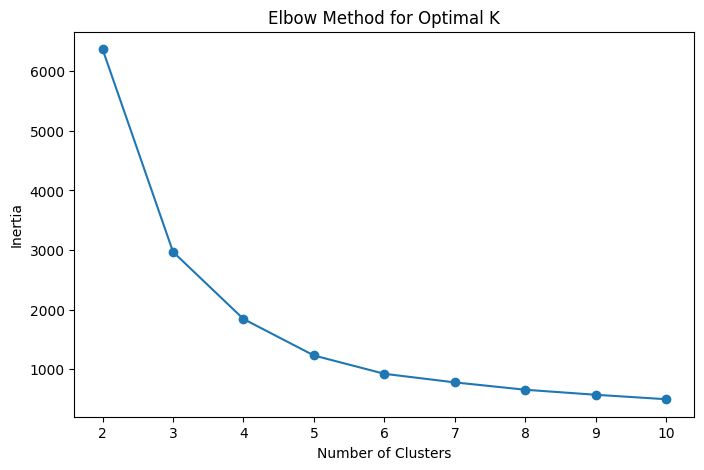

Silhouette Score for 3 clusters: 0.5430969746601425
Silhouette Score for 4 clusters: 0.4982882908791874
Silhouette Score for 5 clusters: 0.49714634187764695


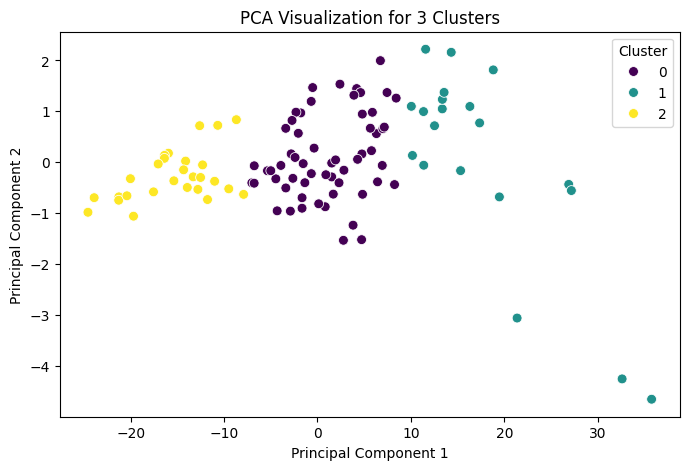

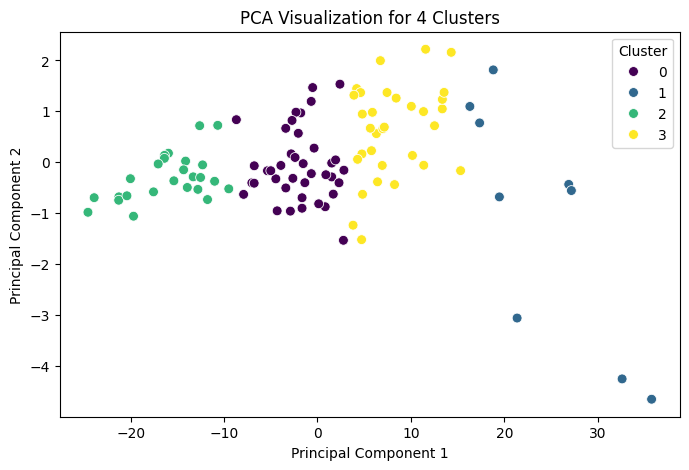

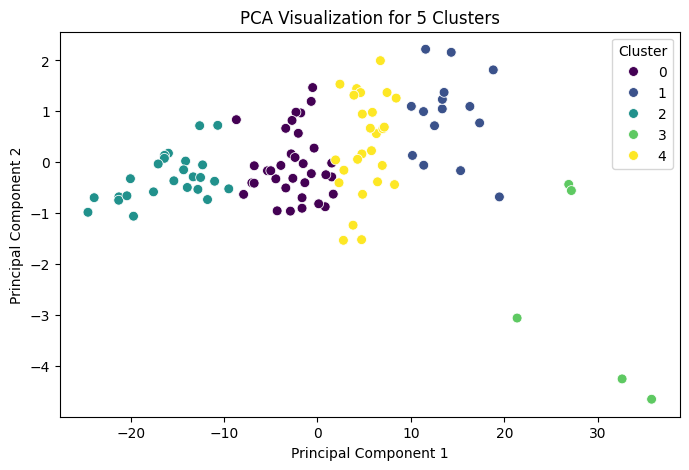


Top Topics for 3-Cluster Solution:

Top 15 topics for Cluster 0 in 3-Cluster Solution:
Cluster_5: 1.7931
Love and Affection: 1.6315
Leaving and Letting Go: 1.5134
Happiness and Gratitude: 1.4465
Pleasure and Seduction: 1.4186
Moments and Realizations: 1.3340
Breaking and Letting Go: 1.2694
Expressions of Joy and Amusement: 1.2578
Possession and Desire: 1.2273
Nods and Agreement: 1.2172
Nightlife and Events: 1.1813
Conversations and Communication: 1.1157
Romance and Feelings: 1.1146
Cluster_4: 1.0862
Excuses and Justifications: 0.9886
Top 15 topics for Cluster 1 in 3-Cluster Solution:
Leaving and Letting Go: 3.3356
Love and Affection: 3.3143
Pleasure and Seduction: 3.2213
Possession and Desire: 3.1897
Happiness and Gratitude: 3.1765
Breaking and Letting Go: 3.0641
Moments and Realizations: 3.0532
Expressions of Joy and Amusement: 2.9650
Conversations and Communication: 2.8764
Nods and Agreement: 2.8340
Nightlife and Events: 2.8054
Excuses and Justifications: 2.6919
Gratitude and Apprec

In [13]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
dataset_path = '/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/results/all_books_all_topics.csv'
df = pd.read_csv(dataset_path)

# Step 3: Data Preparation
# Check for missing values
print(f"Missing values in the dataset: {df.isnull().sum()}")
df.dropna(inplace=True)

# Standardize the probability scores
scaler = StandardScaler()
df['Probability'] = scaler.fit_transform(df[['Probability']])

# Reshape data for clustering
pivot_df = df.pivot(index='Book Title', columns='Topic', values='Probability').fillna(0)

# Include Topic Labels in the analysis
topic_mapping = df[['Topic', 'Topic_Label']].drop_duplicates().set_index('Topic')['Topic_Label']

# Step 4: Determine optimal number of clusters using elbow method
inertia = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pivot_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Step 5: KMeans clustering and silhouette score
results = {}
for k in [3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(pivot_df)
    pivot_df[f'Cluster_{k}'] = clusters
    silhouette_avg = silhouette_score(pivot_df.drop(columns=[f'Cluster_{k}']), clusters)
    results[k] = silhouette_avg
    print(f"Silhouette Score for {k} clusters: {silhouette_avg}")

# Step 6: Apply PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(pivot_df.drop(columns=[f'Cluster_{k}' for k in [3, 4, 5]]))

# Scatter plot for visualization
for k in [3, 4, 5]:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(
        x=pca_data[:, 0],
        y=pca_data[:, 1],
        hue=pivot_df[f'Cluster_{k}'],
        palette='viridis',
        s=50
    )
    plt.title(f'PCA Visualization for {k} Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster')
    plt.show()

# Step 7: Topical Dominance Analysis with Labels
for k in [3, 4, 5]:
    print(f"\nTop Topics for {k}-Cluster Solution:\n")
    cluster_stats = pivot_df.groupby(f'Cluster_{k}').mean()
    for cluster in range(k):
        top_topics = cluster_stats.loc[cluster].sort_values(ascending=False).head(15)
        top_topics_labels = [(topic_mapping.get(topic, topic), value) for topic, value in top_topics.items()]

        print(f"Top 15 topics for Cluster {cluster} in {k}-Cluster Solution:")
        for label, value in top_topics_labels:
            print(f"{label}: {value:.4f}")

# Step 8: Detailed Analysis for 5 Clusters
pivot_df['Cluster'] = pivot_df['Cluster_5']
for cluster in range(5):
    cluster_books = pivot_df[pivot_df['Cluster'] == cluster].index.tolist()[:5]
    print(f"\nTop 5 books in Cluster {cluster}:")
    print(cluster_books)

    cluster_probs = pivot_df.loc[pivot_df['Cluster'] == cluster].mean()
    mean_prob = cluster_probs.mean()
    std_prob = cluster_probs.std()
    var_prob = cluster_probs.var()

    print(f"Cluster {cluster} - Mean Probability: {mean_prob:.4f}, Std Dev: {std_prob:.4f}, Variance: {var_prob:.4f}")

# Cross-Cluster Comparison
print("\nCross-Cluster Correlation Analysis:")
for cluster_1 in range(5):
    for cluster_2 in range(cluster_1 + 1, 5):
        correlation = pivot_df.loc[pivot_df['Cluster'] == cluster_1].mean().corr(
            pivot_df.loc[pivot_df['Cluster'] == cluster_2].mean()
        )
        print(f"Correlation between Cluster {cluster_1} and Cluster {cluster_2}: {correlation:.4f}")

Missing values in the dataset: Book Title     0
Topic          0
Topic_Label    0
Probability    0
dtype: int64


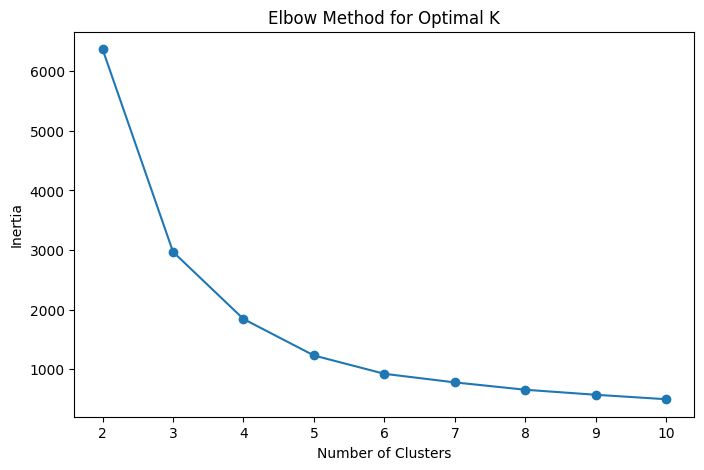

Silhouette Score for 3 clusters: 0.5430969746601425
Silhouette Score for 4 clusters: 0.4982882908791874
Silhouette Score for 5 clusters: 0.49714634187764695


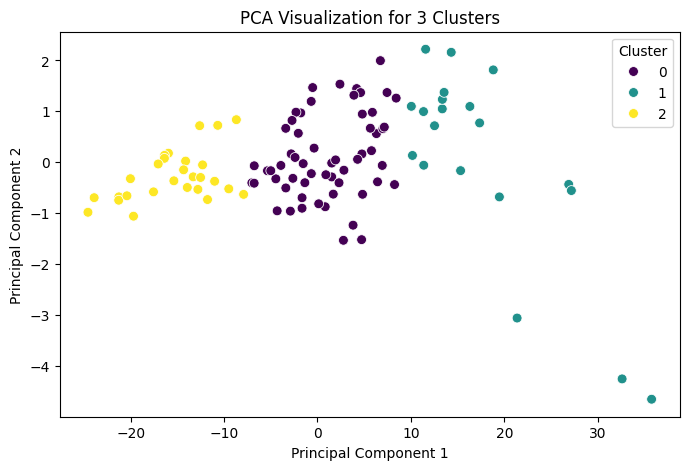

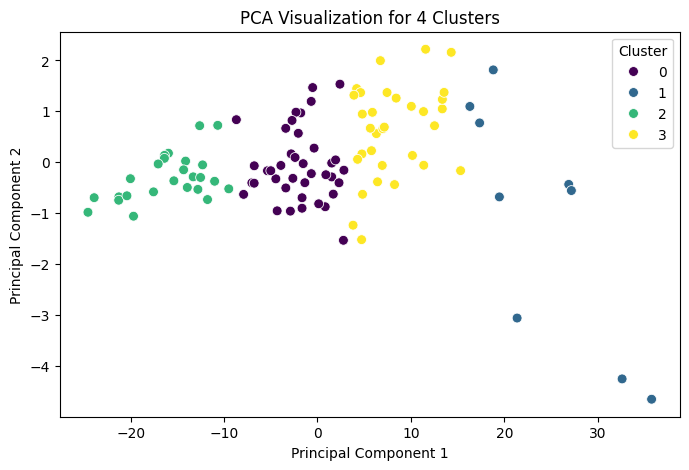

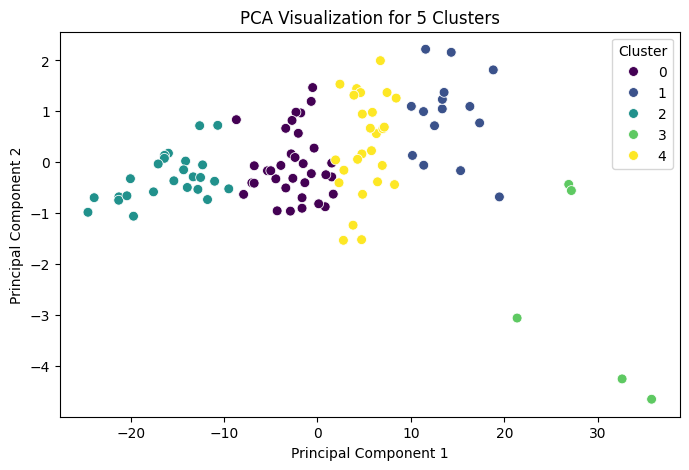

Top 15 topics for Cluster 0 in 3-Cluster Solution:
Topic
Cluster_5    1.793103
Topic_72     1.631492
Topic_70     1.513368
Topic_201    1.446544
Topic_102    1.418550
Topic_175    1.333980
Topic_129    1.269416
Topic_0      1.257812
Topic_117    1.227288
Topic_36     1.217201
Topic_12     1.181306
Topic_14     1.115712
Topic_167    1.114596
Cluster_4    1.086207
Topic_178    0.988643
Name: 0, dtype: float64
Top 15 topics for Cluster 1 in 3-Cluster Solution:
Topic
Topic_70     3.335596
Topic_72     3.314290
Topic_102    3.221285
Topic_117    3.189720
Topic_201    3.176484
Topic_129    3.064052
Topic_175    3.053165
Topic_0      2.964962
Topic_14     2.876387
Topic_36     2.834002
Topic_12     2.805359
Topic_178    2.691870
Topic_84     2.586590
Topic_167    2.514524
Topic_51     2.508495
Name: 1, dtype: float64
Top 15 topics for Cluster 2 in 3-Cluster Solution:
Topic
Cluster_5    1.851852
Cluster_4    1.851852
Topic_72    -0.275327
Topic_70    -0.342139
Topic_201   -0.376486
Topic_102  

In [12]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
dataset_path = '/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/results/all_books_all_topics.csv'
df = pd.read_csv(dataset_path)

# Step 3: Data Preparation
# Check for missing values
print(f"Missing values in the dataset: {df.isnull().sum()}")
df.dropna(inplace=True)

# Standardize the probability scores
scaler = StandardScaler()
df['Probability'] = scaler.fit_transform(df[['Probability']])

# Reshape data for clustering
pivot_df = df.pivot(index='Book Title', columns='Topic', values='Probability').fillna(0)

# Step 4: Determine optimal number of clusters using elbow method
inertia = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pivot_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Step 5: KMeans clustering and silhouette score
results = {}
for k in [3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(pivot_df)
    pivot_df[f'Cluster_{k}'] = clusters
    silhouette_avg = silhouette_score(pivot_df.drop(columns=[f'Cluster_{k}']), clusters)
    results[k] = silhouette_avg
    print(f"Silhouette Score for {k} clusters: {silhouette_avg}")

# Step 6: Apply PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(pivot_df.drop(columns=[f'Cluster_{k}' for k in [3, 4, 5]]))

# Scatter plot for visualization
for k in [3, 4, 5]:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(
        x=pca_data[:, 0],
        y=pca_data[:, 1],
        hue=pivot_df[f'Cluster_{k}'],
        palette='viridis',
        s=50
    )
    plt.title(f'PCA Visualization for {k} Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster')
    plt.show()

# Step 7: Topical Dominance Analysis
for k in [3, 4, 5]:
    cluster_stats = pivot_df.groupby(f'Cluster_{k}').mean()
    for cluster in range(k):
        top_topics = cluster_stats.loc[cluster].sort_values(ascending=False).head(15)
        print(f"Top 15 topics for Cluster {cluster} in {k}-Cluster Solution:")
        print(top_topics)

# Step 8: Detailed Analysis for 5 Clusters
pivot_df['Cluster'] = pivot_df['Cluster_5']
for cluster in range(5):
    cluster_books = pivot_df[pivot_df['Cluster'] == cluster].index.tolist()[:5]
    print(f"Top 5 books in Cluster {cluster}:")
    print(cluster_books)

    cluster_probs = pivot_df.loc[pivot_df['Cluster'] == cluster].mean()
    mean_prob = cluster_probs.mean()
    std_prob = cluster_probs.std()
    var_prob = cluster_probs.var()

    print(f"Cluster {cluster} - Mean Probability: {mean_prob:.4f}, Std Dev: {std_prob:.4f}, Variance: {var_prob:.4f}")

# Cross-Cluster Comparison
for cluster_1 in range(5):
    for cluster_2 in range(cluster_1 + 1, 5):
        correlation = pivot_df.loc[pivot_df['Cluster'] == cluster_1].mean().corr(
            pivot_df.loc[pivot_df['Cluster'] == cluster_2].mean()
        )
        print(f"Correlation between Cluster {cluster_1} and Cluster {cluster_2}: {correlation:.4f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Preview:
                              Book Title    Topic  \
0                     A Long Time Coming  Topic_0   
1                     A Not So Meet Cute  Topic_0   
2                           Ache for You  Topic_0   
3  An Accidental Date with a Billionaire  Topic_0   
4                               Bad Boss  Topic_0   

                        Topic_Label  Probability  
0  Expressions of Joy and Amusement    79.474938  
1  Expressions of Joy and Amusement    71.655854  
2  Expressions of Joy and Amusement    56.319151  
3  Expressions of Joy and Amusement    26.288002  
4  Expressions of Joy and Amusement    43.874309  

Missing Values:
Book Title     0
Topic          0
Topic_Label    0
Probability    0
dtype: int64

Data Types:
Book Title      object
Topic           object
Topic_Label     object
Probability    float64
dtype: object

Standardize

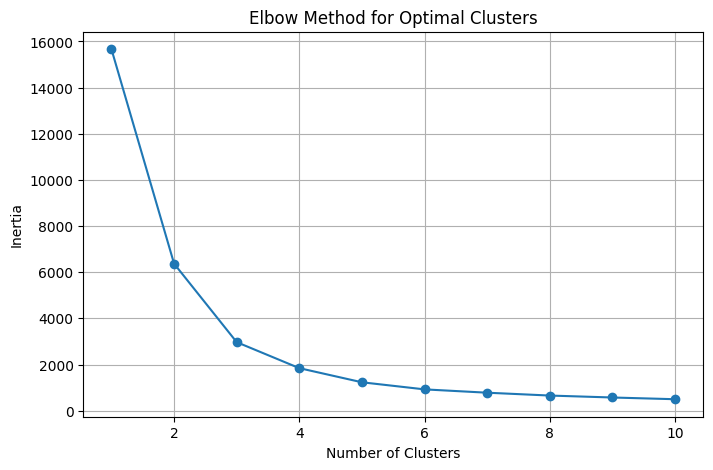


Silhouette Score for 3 clusters: 0.5430969746601425

Silhouette Score for 4 clusters: 0.49822610221934066

Silhouette Score for 5 clusters: 0.4987220608238998

Explained Variance by PCA Components: [0.97951915 0.00765893]


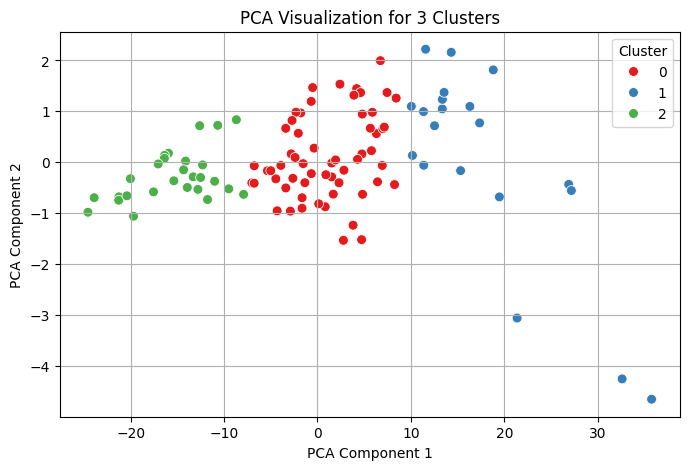

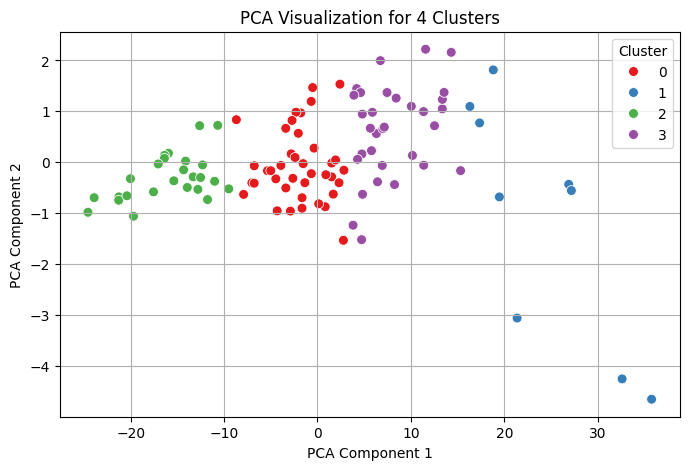

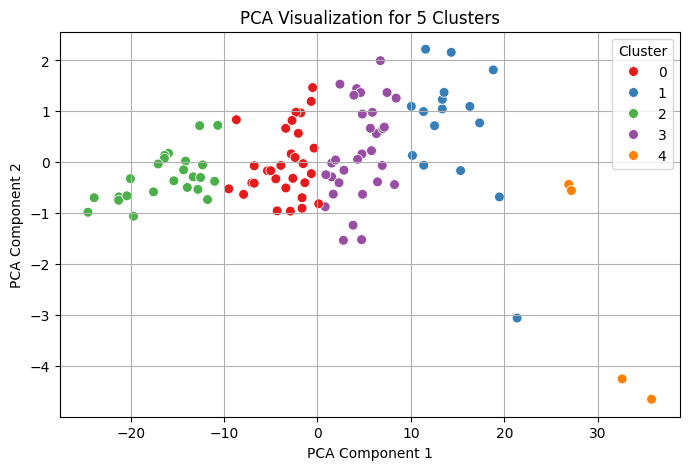


Cluster 0 - Top 5 Books:
['Bad Boss' 'Beauty and the Boss' 'Bedding the Billionaire'
 'Billionaire Bad Boy' 'Boss']

Cluster 1 - Top 5 Books:
['A Long Time Coming' 'A Not So Meet Cute' 'Blue Eyed Devil'
 'Brooklynaire' 'Brutal Billionaire']

Cluster 2 - Top 5 Books:
['An Accidental Date with a Billionaire' 'Billionaire Beast'
 'Billionaire Hero' 'Billionaire Protector' 'Carter Grayson']

Cluster 3 - Top 5 Books:
['Ache for You' 'Banking the Billionaire' 'Beauty and the Billionaire'
 'Between Commitment and Betrayal' 'Between Love and Loathing']

Cluster 4 - Top 5 Books:
["The Billionaire's Christmas Bride" "The Billionaire's Secret"
 'The Stopover' 'The Takeover']

Cluster 0:
Mean Probabilities:
Topic
Topic_72     1.108602
Topic_70     1.003506
Topic_201    0.963457
Topic_102    0.940268
Topic_175    0.839105
Topic_0      0.801069
Topic_117    0.781470
Topic_129    0.780055
Topic_36     0.754435
Topic_12     0.724348
Topic_167    0.685741
Topic_14     0.678410
Topic_157    0.545968
To

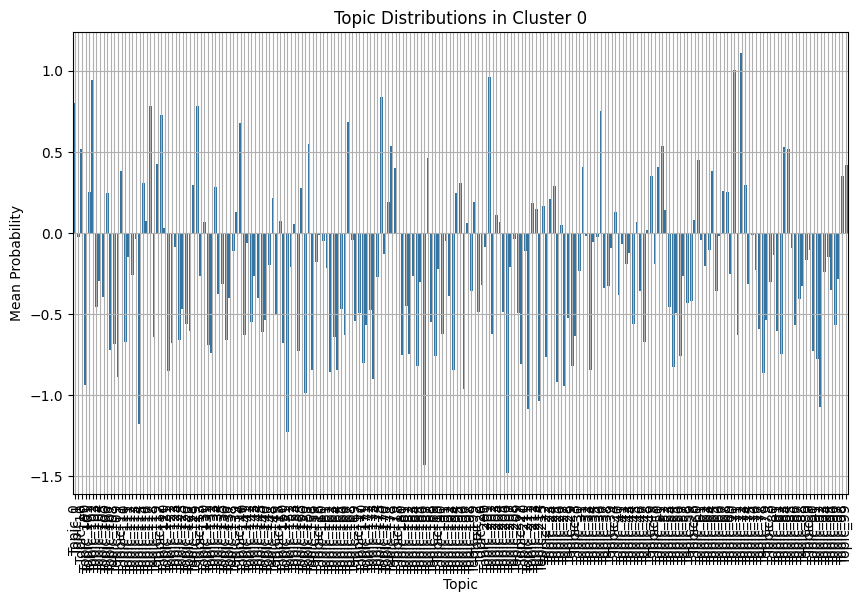

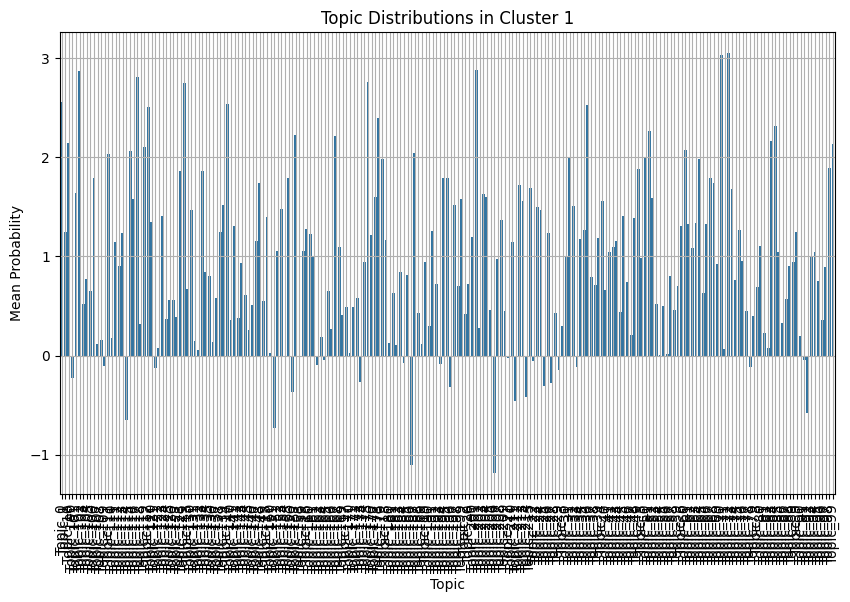

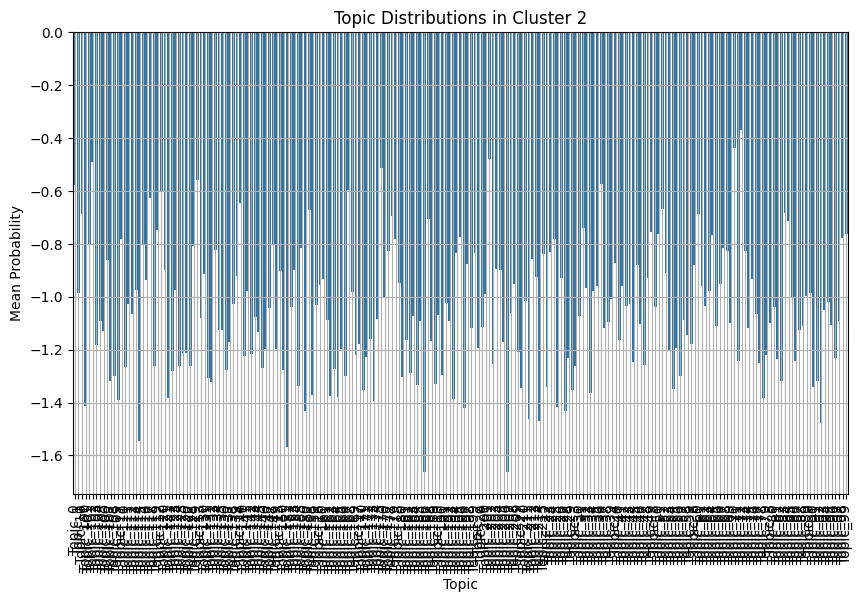

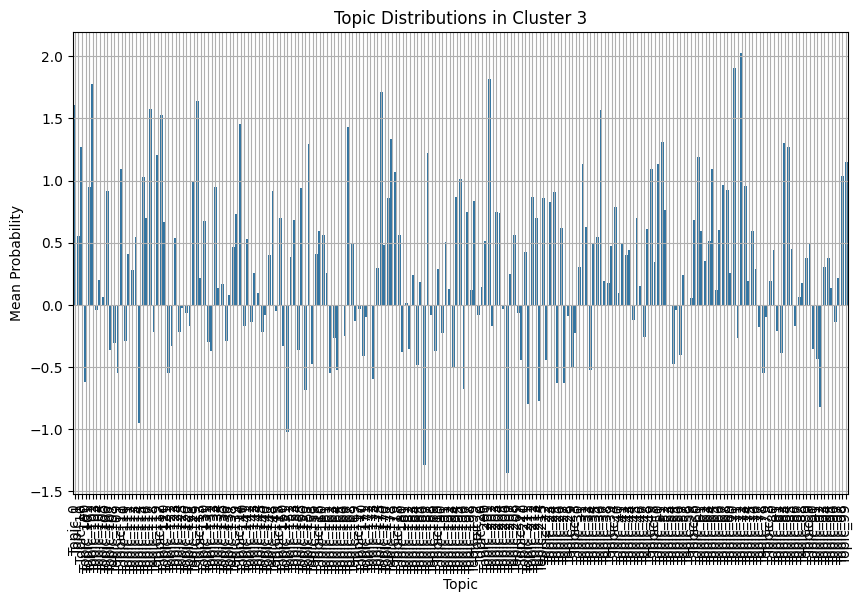

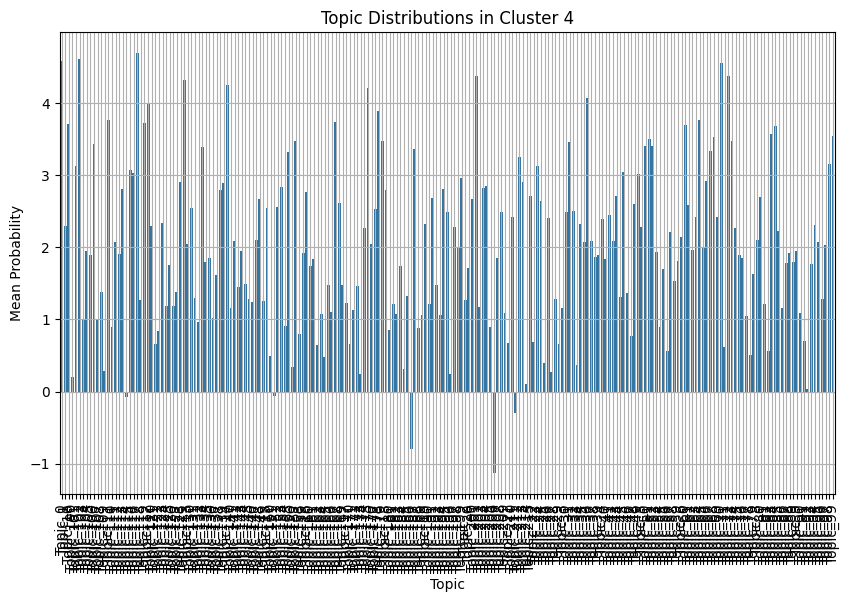

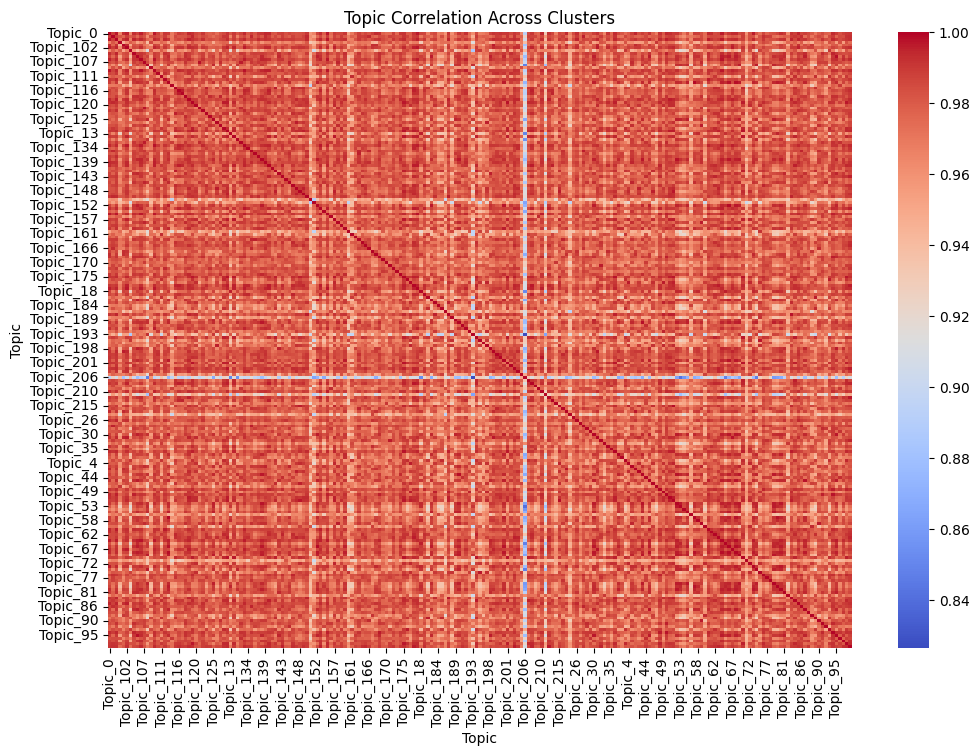

In [ ]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

# Load the dataset
dataset_path = '/content/drive/MyDrive/BERTTopic_Models/paraphrase-MiniLM-L6-v2/results/all_books_all_topics.csv'
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset for verification
print("Dataset Preview:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Drop missing values if any
df.dropna(inplace=True)

# Verify data types
print("\nData Types:")
print(df.dtypes)

# Standardize probability scores
scaler = StandardScaler()
df['Probability_Standardized'] = scaler.fit_transform(df[['Probability']])

# Verify standardization
print("\nStandardized Probabilities (mean and std):")
print(df['Probability_Standardized'].mean(), df['Probability_Standardized'].std())

# Reshape data for clustering (pivot table)
data_pivot = df.pivot_table(index='Book Title', columns='Topic', values='Probability_Standardized', fill_value=0)

# Verify reshaped data
print("\nPivot Table Shape:", data_pivot.shape)
print(data_pivot.head())

# Step 2: Clustering Analysis

# Elbow method to determine the optimal number of clusters
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pivot)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Perform clustering for 3, 4, and 5 clusters
clusters = {}
silhouette_scores = {}

for n_clusters in [3, 4, 5]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_pivot)
    clusters[n_clusters] = labels
    silhouette_scores[n_clusters] = silhouette_score(data_pivot, labels)
    print(f"\nSilhouette Score for {n_clusters} clusters: {silhouette_scores[n_clusters]}")

# Step 3: PCA for Dimensionality Reduction and Visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_pivot)

# Verify explained variance
print("\nExplained Variance by PCA Components:", pca.explained_variance_ratio_)

# Visualize clusters for 3, 4, and 5 clusters
for n_clusters in [3, 4, 5]:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters[n_clusters], palette='Set1', s=50)
    plt.title(f'PCA Visualization for {n_clusters} Clusters')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Cluster')
    plt.grid()
    plt.show()

# Step 4: Detailed Analysis for 5 Clusters
labels_5_clusters = clusters[5]
df['Cluster'] = df['Book Title'].map(dict(zip(data_pivot.index, labels_5_clusters)))

# List the top 5 book titles for each cluster
for cluster in range(5):
    print(f"\nCluster {cluster} - Top 5 Books:")
    print(df[df['Cluster'] == cluster]['Book Title'].unique()[:5])

# Analyze topic dominance, specificity, and spread
cluster_stats = []

for cluster in range(5):
    cluster_data = data_pivot[labels_5_clusters == cluster]
    mean_prob = cluster_data.mean()
    std_prob = cluster_data.std()
    cluster_stats.append((mean_prob, std_prob))
    print(f"\nCluster {cluster}:")
    print(f"Mean Probabilities:\n{mean_prob.sort_values(ascending=False)[:15]}")
    print(f"Standard Deviations:\n{std_prob.sort_values(ascending=False)[:15]}")

# Step 5: Visualizations
# Visualize topic distributions for each cluster
for cluster in range(5):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cluster_stats[cluster][0].index, y=cluster_stats[cluster][0].values)
    plt.title(f'Topic Distributions in Cluster {cluster}')
    plt.xlabel('Topic')
    plt.ylabel('Mean Probability')
    plt.xticks(rotation=90)
    plt.grid()
    plt.show()

# Correlation analysis for cross-cluster comparison
correlation_matrix = data_pivot.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Topic Correlation Across Clusters')
plt.show()
